# Importing libraries
Just importing some libraries. Also, before you try to run this notebook, make sure the dataset is on the same folder!

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import os 

import matplotlib.pyplot as plt
from matplotlib.image import imread

import numpy as np

import scipy

import torch
import torch.nn.functional as F

from torch import optim
from torch import nn
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

# Data split, augmentation and loaders
Now we're going to visualize the data and define the loaders! Since we only have a training and test set, we're gonna split the latter on testing and validation set. We're also going to apply transforms to the data so better train the model!

In [15]:
mean = [0.485, 0.456, 0.406];
std = [0.229, 0.224, 0.225];

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([transforms.Resize(330),
                               transforms.RandomCrop(300),   
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(24),
                               transforms.ToTensor(),
                               transforms.Normalize(mean = mean, std = std)])

# choose the training and test datasets
total_data =  datasets.ImageFolder('staticmap', transform=transform)

num_workers = 0
batch_size = 64
valid_size = 0.5      # percentage of training set to use as validation


# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([transforms.Resize(330),
                                transforms.CenterCrop(300),
                                transforms.ToTensor(),
                                transforms.Normalize(mean = mean, std = std)])

# choose the training and test datasets
train_data =  datasets.ImageFolder('staticmap/train', transform=transform)
test_data =  datasets.ImageFolder('staticmap/test', transform=transform)


# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)


# specify the image classes
classes = ["industrial", "residential"]


# Data visualization

In [44]:
# helper function to un-normalize and display an image
def imshow(img):
    for idx, channel in enumerate(img):   # we use a custom 'mean' and 'std'. Therefore, we need to loop through each channel and unnormalize properly
        img[idx] = ((img[idx] * std[idx]) + mean[idx])
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

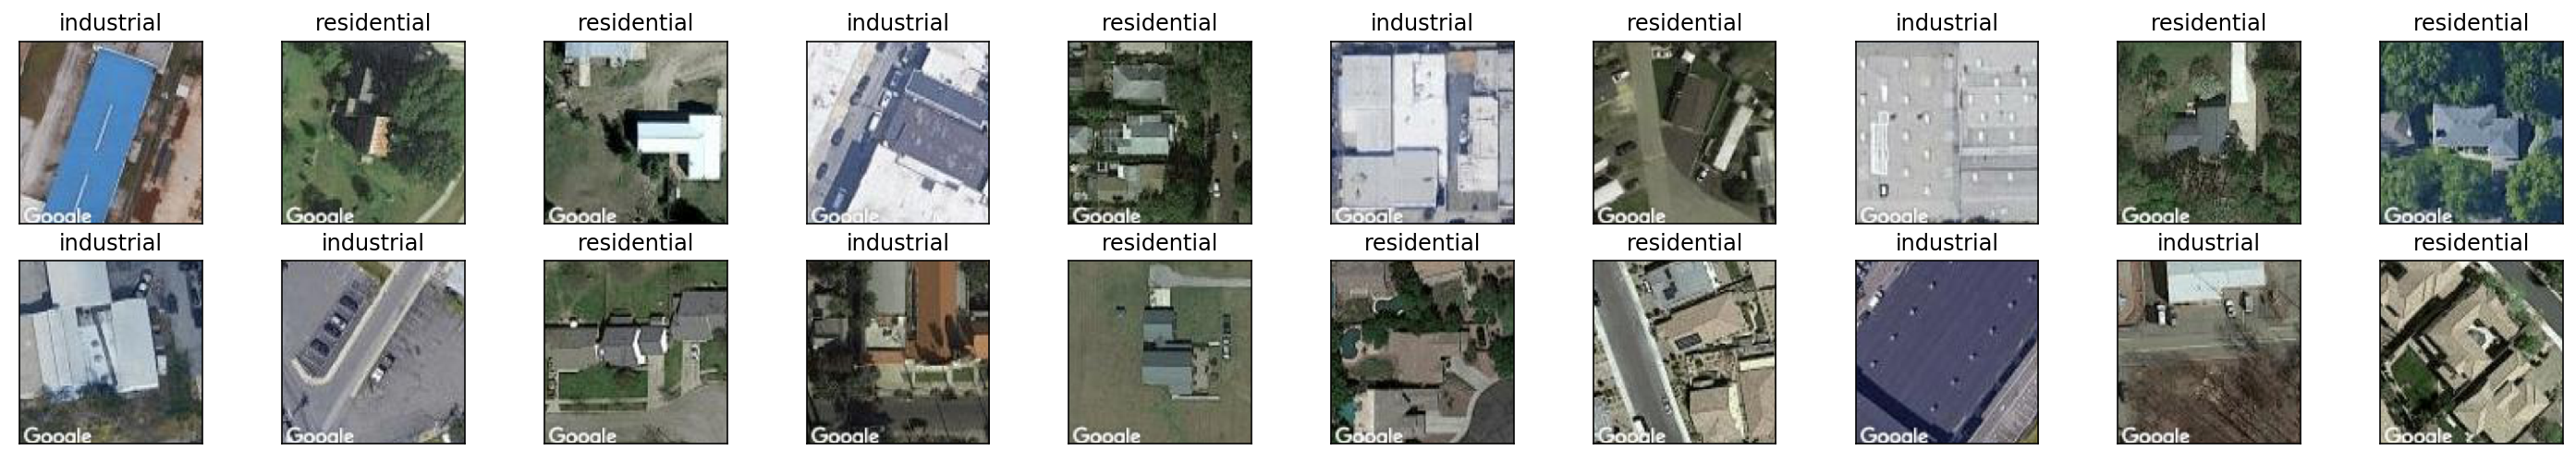

In [45]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])